# TITANIC DATASET ANALYSIS

Import every necessary library.

In [35]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold


data = pd.read_csv('titanic.csv')

Construct the database and dropping unnecessary columns.

In [2]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [22]:
# Treating NaN values
processed_data = data.fillna({'age': data['age'].mean()}, inplace=True)

# Remove boat, body and cabin columns
processed_data = data.drop(['boat', 'body', 'cabin'], axis=1) 

# Encoding categorical values
processed_data = pd.get_dummies(processed_data, columns=['sex', 'embarked'])

processed_data = processed_data.drop(['name', 'ticket', 'home.dest'], axis=1)

processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1308 non-null   float64
 6   sex_female  1309 non-null   bool   
 7   sex_male    1309 non-null   bool   
 8   embarked_C  1309 non-null   bool   
 9   embarked_Q  1309 non-null   bool   
 10  embarked_S  1309 non-null   bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 67.9 KB


(array([   4.,   14.,  175.,  500., 1235., 1407., 1173.,  387.,   98.,
           7.]),
 array([66.76829268, 68.44512195, 70.12195122, 71.79878049, 73.47560976,
        75.15243902, 76.82926829, 78.50609756, 80.18292683, 81.8597561 ,
        83.53658537]),
 <BarContainer object of 10 artists>)

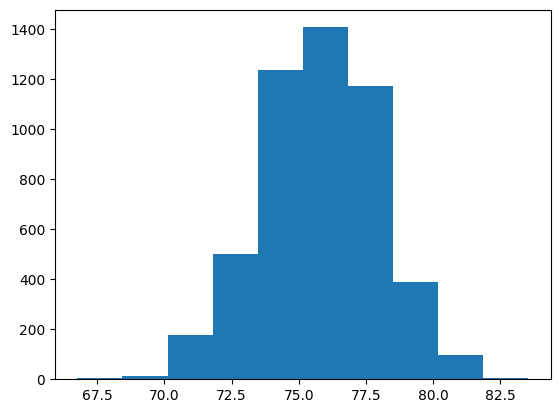

In [38]:
all_inputs = processed_data.drop('survived', axis=1)
all_labels = processed_data['survived']

from sklearn.tree import DecisionTreeClassifier

model_accuracy = []
for _ in range(5000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)


    # Create the classifier
    classifier = DecisionTreeClassifier()

    # Train the classifier on the training set
    classifier.fit(training_inputs, training_classes)

    # Validate the classifier on the testing set using classification accuracy
    model_accuracy.append(classifier.score(testing_inputs, testing_classes) * 100)
    
plt.hist(model_accuracy)

Text(0.5, 1.0, 'Average score: 77.99706400469759')

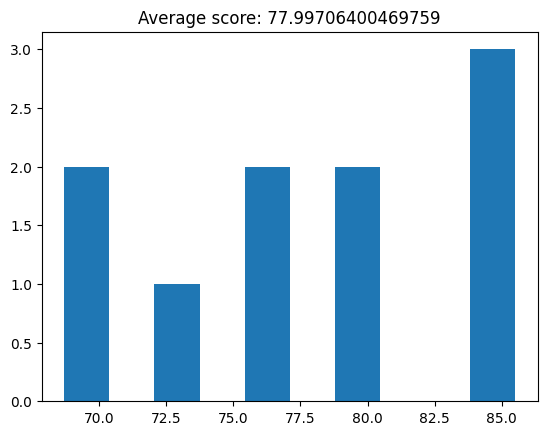

In [54]:
import numpy as np
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
scores = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10) * 100; 
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Best score: 0.7799706400469758
Best parameters: {'max_depth': 1, 'max_features': 7}


Text(50.722222222222214, 0.5, 'max_depth')

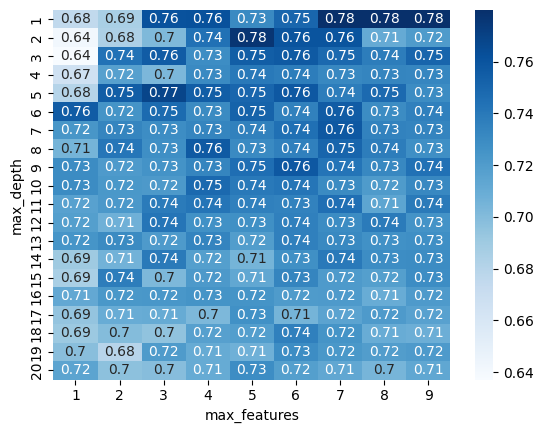

In [60]:

from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV( decision_tree_classifier, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (20, 9)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(9) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(20) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#! tirar isto q isto é copy paste
def print_accuracy_score(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: ", accuracy)

random_forest_classifier = RandomForestClassifier()

random_forest_classifier.fit(training_inputs, training_classes)

predictions = random_forest_classifier.predict(testing_inputs)

print_accuracy_score(testing_classes, predictions)

Accuracy:  0.774390243902439
